In [59]:
import numpy as np
# import cv2

import pylab as plt
import matplotlib as mpl
from sklearn.cluster import BisectingKMeans, KMeans
from scipy.ndimage import median_filter

import tifffile as tiff

import os

import prepare_utils

%load_ext autoreload
%autoreload 2

%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cmap = mpl.cm.get_cmap('gray_r', 5)

# Подгрузка данных

In [3]:
dir_path = './label_data'

data_dir_path = os.path.join(dir_path, 'data')
filenames = os.listdir(data_dir_path)

In [4]:
data = tiff.imread(os.path.join(data_dir_path, filenames[0]))

<IPython.core.display.Javascript object>


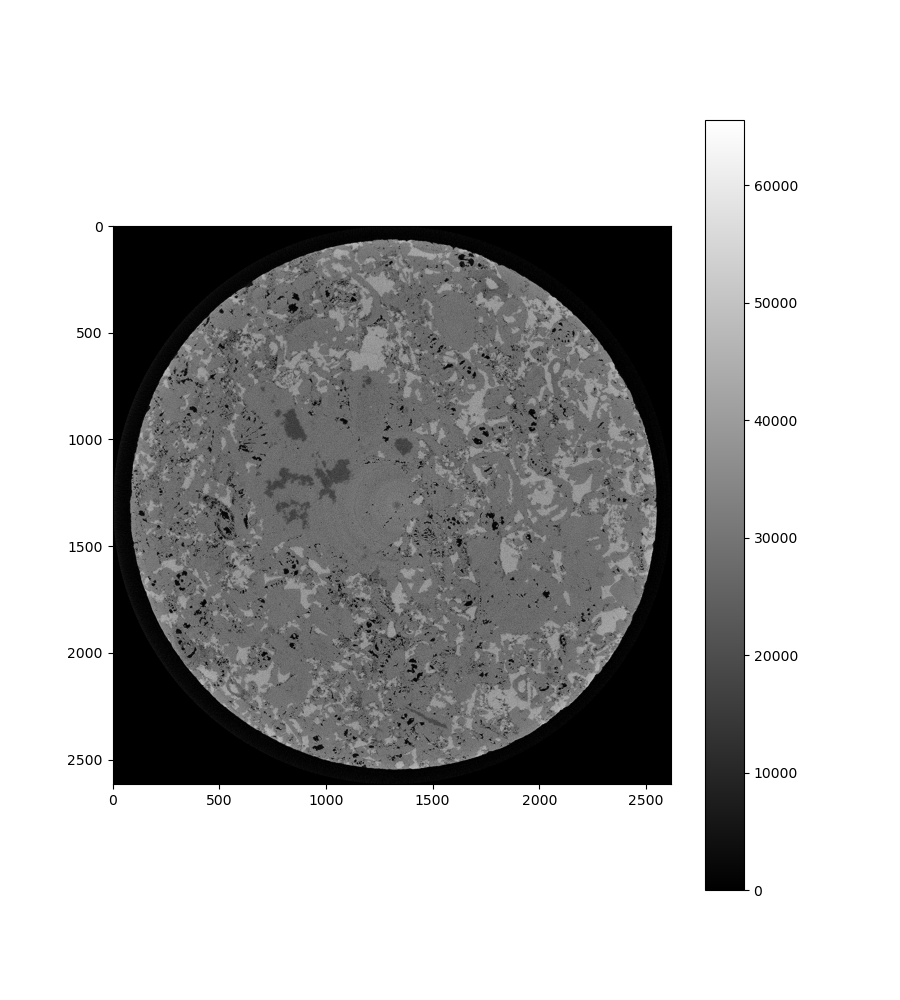

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 10))
im = plt.imshow(data, aspect='equal', cmap='gray')
plt.colorbar(im)
# Drawing_uncolored_circle = plt.Circle( (1291, 1291 ),
#                                       1220,
#                                       fill=False,
#                                       color='r')
# axs.add_artist( Drawing_uncolored_circle )

In [31]:
# data_blur_7, sobelx, sobely = prepare_utils.calculate(data=data, kernel_size=7, half_size=1307, radius=1230, even_number=False)

In [52]:
data_blur, sobelx, sobely = prepare_utils.calculate(data=data,
                                                    kernel_size=7,
                                                    half_size=1307,
                                                    radius=1230,
                                                    even_number=False)

In [63]:
filt_data = median_filter(data_blur, size=15)

In [53]:
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

# im = axs[0].imshow(data_blur_7, aspect='equal', cmap='gray')
# # plt.colorbar(im, ax=axs[0])

# im = axs[1].imshow(data_blur, aspect='equal', cmap='gray')
# # plt.colorbar(im, ax=axs[1])

# # im = axs[2].imshow(sobely, aspect='equal', cmap='gray')
# # # plt.colorbar(im, ax=axs[2])

In [64]:
nan_mask = prepare_utils.get_nan_mask(filt_data)
no_nan_data = filt_data[~nan_mask]
reshaped_data = no_nan_data.reshape(no_nan_data.shape+(1,))

In [65]:
reshaped_data.shape

(4757795, 1)

In [66]:
bisect_means = BisectingKMeans(n_clusters=5, random_state=0, init='k-means++').fit(reshaped_data)

In [67]:
labels = bisect_means.labels_
result = np.zeros(data_blur.shape)
result[~nan_mask] = labels
result[nan_mask] = np.nan

In [68]:
filt_result = median_filter(result, size=15)

<IPython.core.display.Javascript object>


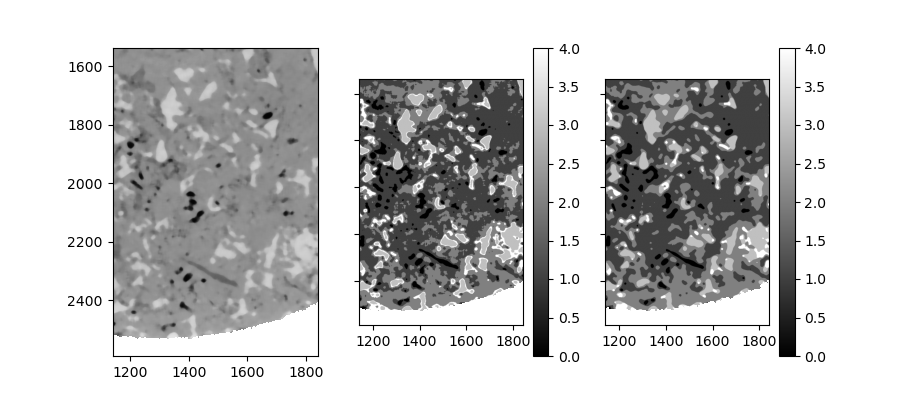

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(filt_data, aspect='equal', cmap='gray')
# plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(result, aspect='equal', cmap='gray')
plt.colorbar(im, ax=axs[1])

im = axs[2].imshow(filt_result, aspect='equal', cmap='gray')
plt.colorbar(im, ax=axs[2])

In [118]:
tiff.imwrite('Label_rec_00400.tif', result.astype(np.uint8))

In [4]:
from tqdm.notebook import tqdm

In [5]:
data_blur_list = []
sobelx_list = []
sobely_list = []
for i, filename in enumerate(tqdm(filenames)):
    data = tiff.imread(os.path.join(dir_path, filenames[0]))
    data_blur, sobelx, sobely = prepare_utils.calculate(data)
    data_blur_list.append(data_blur)
    sobelx_list.append(sobelx)
    sobely_list.append(sobely)

  0%|          | 0/484 [00:00<?, ?it/s]

KeyboardInterrupt: 